In [34]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [2]:
def table_to_dataframe(cur, databaseName, tableName, *columns, distinct=False, **clause):
    if not columns:
        columns = "*"  # 디폴트는 전체 컬럼
    else:
        columns = ', '.join(columns)  # 가변인수를 문자열로 변환
    if distinct:
        columns = 'DISTINCT ' + columns  # 중복 제거가 필요할 경우 적용
    try:
        sqlUse = f"""-- sql
            USE {databaseName}"""
        # 기본 출력 쿼리문
        sqlDisplay = f"""-- sql
            SELECT {columns} FROM {tableName}"""
        # 키워드 인자에 따라 조건 쿼리문 추가
        if clause:
            for k, v in clause.items():
                if k.lower() == 'where':
                    sqlDisplay += f" WHERE {v}"
                elif k.lower() == 'group_by':
                    sqlDisplay += f" GROUP BY {v}"
                elif k.lower() == 'having':
                    sqlDisplay += f" HAVING {v}"
                elif k.lower() == 'order_by':
                    sqlDisplay += f" ORDER BY {v}"
        # 쿼리문이 제대로 작성되었는지 확인
        # print(sqlDisplay)

        cur.execute(sqlUse)
        cur.execute(sqlDisplay)
        # 조회 결과를 데이터프레임으로 저장
        dataframe = pd.DataFrame(cur.fetchall())
        return dataframe
    except Exception as e:
        print(e)  # 에러메세지 출력


In [4]:
# 데이터베이스 접속
conn = pymysql.connect(host='localhost', port=3306,
                        user='root', passwd='1234', db='schoolage', charset='utf8')
# 커서를 딕셔너리 형태로 생성
cur = conn.cursor(pymysql.cursors.DictCursor)

database = "schoolage"
population_table = "population_table"
schoolage_table = "schoolage_table"
birthrate_table = "birthrate_table"
schoolage_detail_table = "schoolage_detail_table"
joined_view = "pop_school_view"


In [28]:
popDF = table_to_dataframe(cur, database, joined_view)
popDF.set_index("연도", inplace=True)
popDF = popDF.astype({"총 인구수(만명)": "int16", "학령인구수(만명)": "int16"})
popDF


,총 인구수(만명),합계출산율,학령인구수(만명)
연도,,,
2013,5114,1.187,952
2014,5133,1.205,926
2015,5153,1.239,900
2016,5170,1.172,876
2017,5178,1.052,853
2018,5183,0.977,833
2019,5185,0.918,810
2020,5183,0.837,790
2021,5164,0.808,772


In [125]:
schDF = table_to_dataframe(cur, database, schoolage_detail_table)
schDF.set_index("연도", inplace=True)
schDF = round(schDF / 10000).astype("int16")
schDF.columns = [f'{col}(만명)' for col in schDF.columns]
schDF


,총합(만명),초등학생(만명),중학생(만명),고등학생(만명),대학생(만명)
연도,,,,,
2013,952,340,190,207,215
2014,926,331,182,200,213
2015,900,327,170,193,211
2016,876,325,155,190,206
2017,853,325,146,182,200
2018,833,330,140,169,193
2019,810,329,136,155,190
2020,790,324,138,146,182
2021,772,322,142,140,169


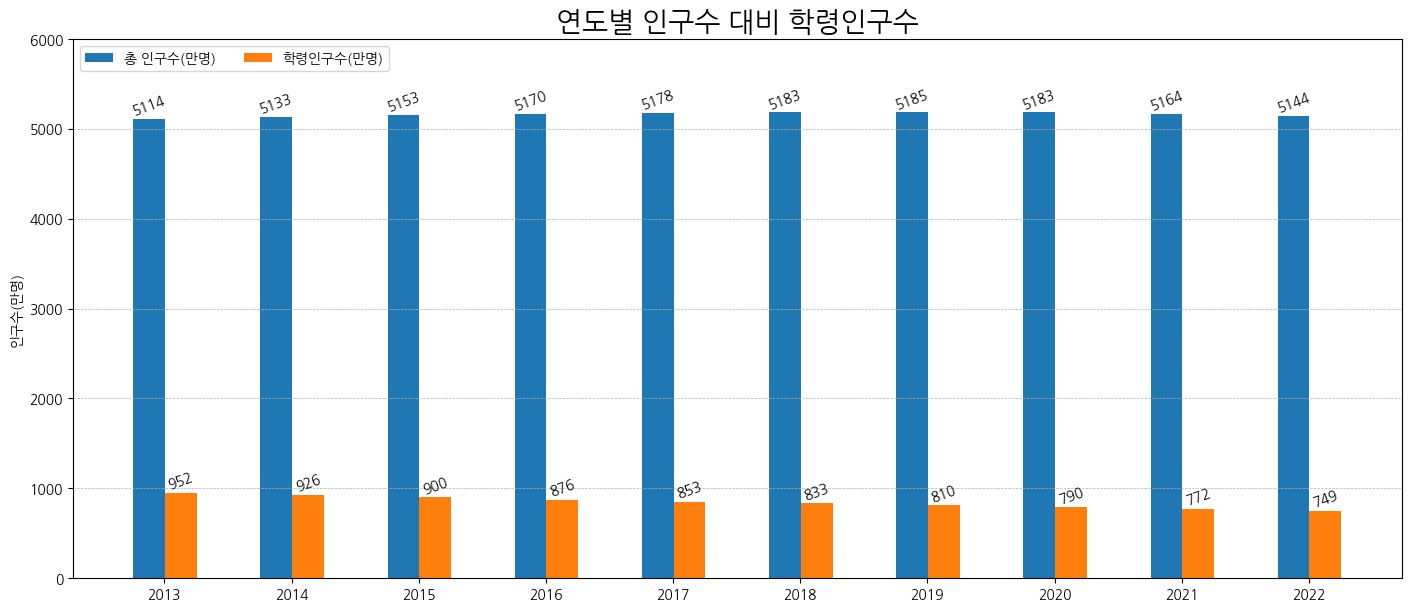

In [103]:
years = tuple(popDF.index)
pop_schDF = popDF[["총 인구수(만명)", "학령인구수(만명)"]]
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(years))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(14,6))

for col in pop_schDF.columns:
    offset = width * multiplier
    rects = ax.bar(x + offset + 0.13, pop_schDF[col], width, label=col)
    ax.bar_label(rects, padding=1, rotation=20)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('인구수(만명)')
ax.set_title('연도별 인구수 대비 학령인구수', fontsize=20)
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 6000)
ax.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()


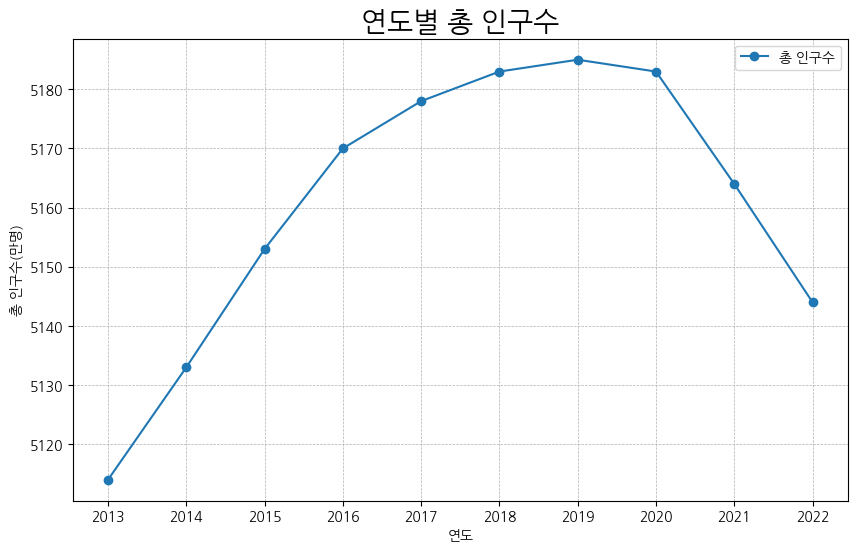

In [114]:
plt.figure(figsize=(10,6))
plt.plot(popDF.index, popDF["총 인구수(만명)"], 'o-', label="총 인구수")
plt.xlabel("연도")
plt.ylabel("총 인구수(만명)")
plt.xticks(popDF.index)
plt.title('연도별 총 인구수', fontsize=20)
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


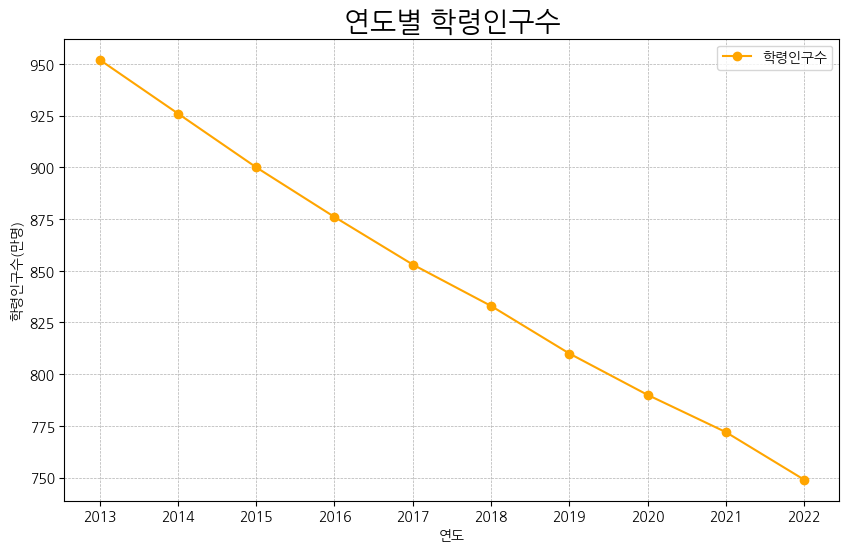

In [113]:
plt.figure(figsize=(10,6))
plt.plot(popDF.index, popDF["학령인구수(만명)"], 'o-', color="orange", label="학령인구수")
plt.xlabel("연도")
plt.ylabel("학령인구수(만명)")
plt.xticks(popDF.index)
plt.title('연도별 학령인구수', fontsize=20)
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


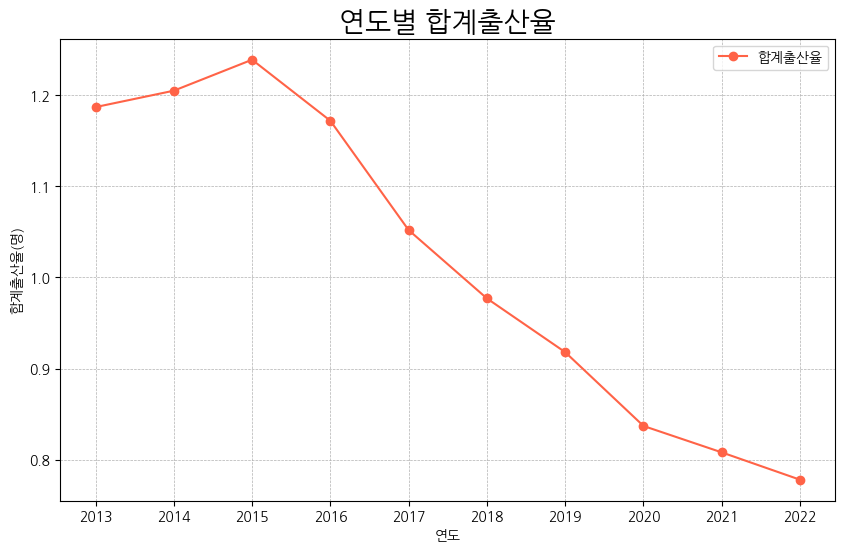

In [112]:
plt.figure(figsize=(10,6))
plt.plot(popDF.index, popDF["합계출산율"], 'o-', color="tomato", label="합계출산율")
plt.xlabel("연도")
plt.ylabel("합계출산율(명)")
plt.xticks(popDF.index)
plt.title('연도별 합계출산율', fontsize=20)
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


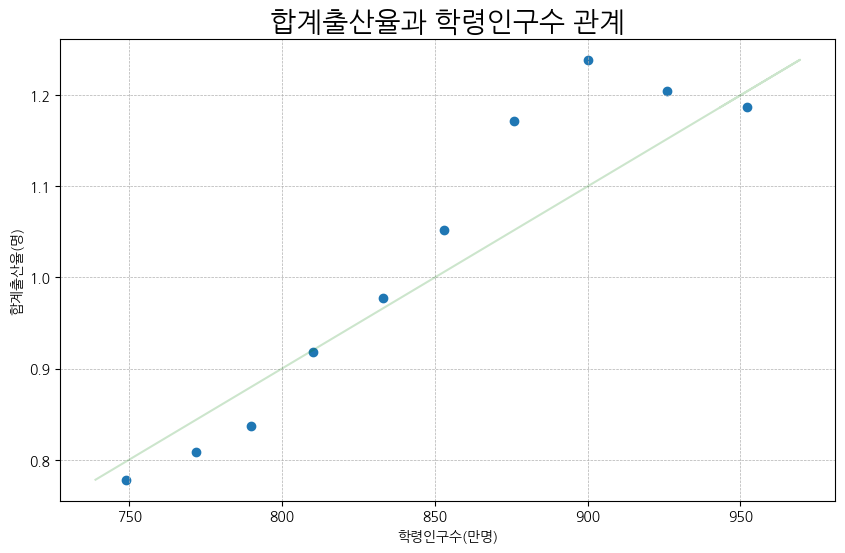

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(popDF["학령인구수(만명)"], popDF["합계출산율"])
plt.plot(popDF["합계출산율"] * 500 + 350, popDF["합계출산율"], color="green", alpha=0.2)
plt.xlabel("학령인구수(만명)")
plt.ylabel("합계출산율(명)")
plt.grid(linestyle='--', linewidth=0.5)
plt.title('합계출산율과 학령인구수 관계', fontsize=20)
plt.show()
